# Loading the dataset

In [1]:
import pandas as pd

# Read the CSV file with a specific encoding
df = pd.read_csv('movie_data.csv', encoding='ISO-8859-1')

# Continue with your data analysis using the DataFrame 'df'
df.head(10)

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


# Data visualization

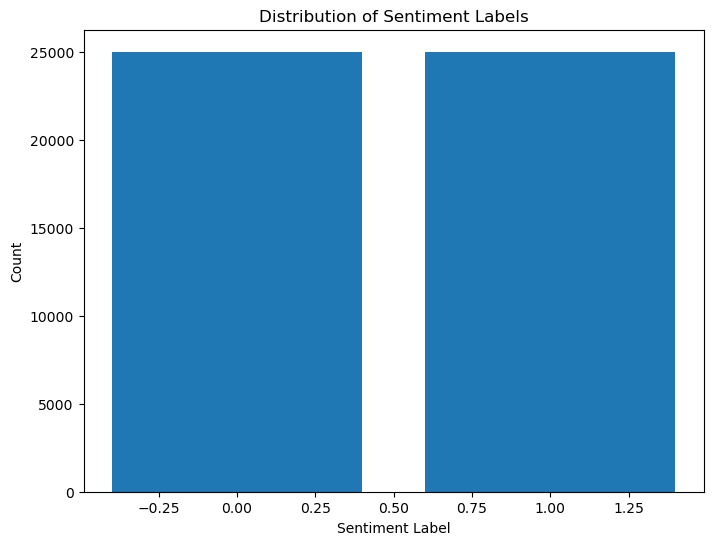

In [2]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

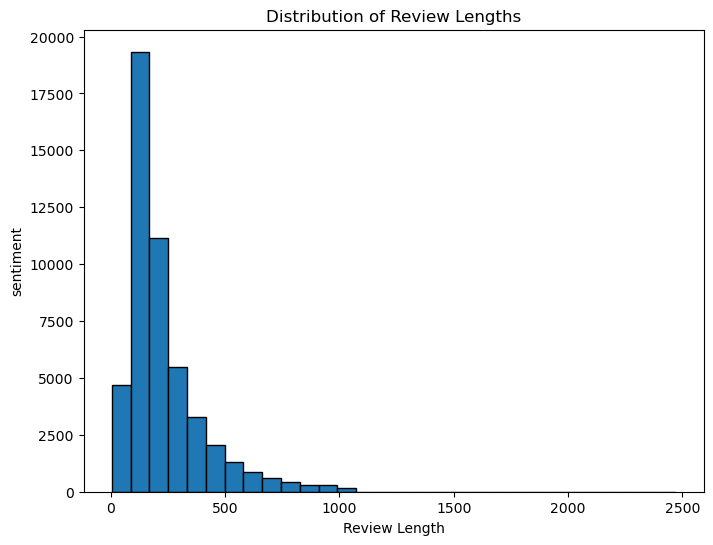

In [3]:
# Calculate the length of each review
review_lengths = df['review'].str.split().apply(len)

# Create a histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(review_lengths, bins=30, edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('sentiment')
plt.title('Distribution of Review Lengths')
plt.show()

In [4]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


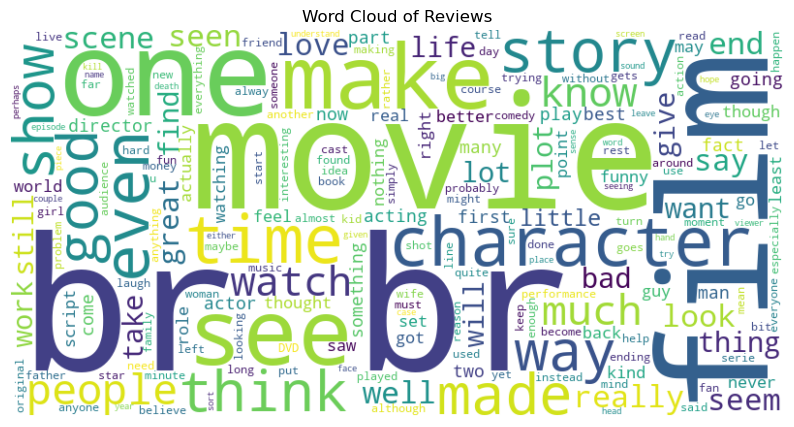

In [5]:
from wordcloud import WordCloud

# Concatenate all the reviews into a single string
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Bag of words / Bag of N-grams model

# Transforming documents into feature vectors

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

docs = np.array(['The sun is shining',
                 'The weather is sweet',
                 'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

In [7]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [8]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


# Word relevancy using term frequency-inverse document frequency

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf_matrix = tfidf.fit_transform(bag)

print(tfidf_matrix.toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


# Data preperation

In [10]:
df.loc[0, 'review'][-50:]

'piens subsp. sapiens was a huge error of judgment.'

In [11]:
import re

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|:=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

In [12]:
preprocessor(df.loc[0, 'review'])

'i grew up b 1965 watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form i took my children to see the movie hoping they would get a glimpse of what i loved as a child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless a waste of film utter rubbish a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was a huge error of judgment '

In [13]:
preprocessor("</a>This :) is a :( test :-)!")

'this is a test :) :( :)'

In [14]:
df['review'] = df['review'].apply(preprocessor)

# Tokenization of documents

In [15]:
from nltk.stem.porter import PorterStemmer


porter = PorterStemmer()

In [16]:
def tokenizer(text):
    return text.split()

In [17]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [18]:
tokenizer('runners likes running thus they run')

['runners', 'likes', 'running', 'thus', 'they', 'run']

In [19]:
tokenizer_porter('runners likes running thus they run')

['runner', 'like', 'run', 'thu', 'they', 'run']

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running so runs a lot')[-10:] if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

# Transform Text Data into TF-IDF Vectors

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

y = df['sentiment'].values
X = tfidf.fit_transform(df['review'])

# Document Classification using Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

In [24]:
import pickle
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

saved_model = open('saved_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.6min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


# Model Evaluation

In [25]:
# Assuming you have already trained the model and loaded it from 'saved_model.sav'
import pickle

# Load the saved model
loaded_model = pickle.load(open('saved_model.sav', 'rb'))

# Evaluate the model on the test data
accuracy = loaded_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.89304
